In [5]:
import time, json
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from fastai.vision.widgets import *
from PIL import Image

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
path = Path('components')

In [ ]:
searches = 'design system button element', 'design system checkbox element', 'design system radio button element'
categories_dict = {'design system button element': 'button', 'design system checkbox element': 'checkbox', 'design system radio button element': 'radio-button'}


for o in searches:
    # Create directory name without spaces for saving files
    dest = (path/categories_dict[o])
    dest.mkdir(exist_ok=True, parents=True)
    
    # Use original search term with spaces for image search
    download_images(dest, urls=search_images(o))
    time.sleep(30)
    # Convert images to RGB and remove original problematic files
    resize_images(dest, max_size=400, dest=dest)

/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be 

In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

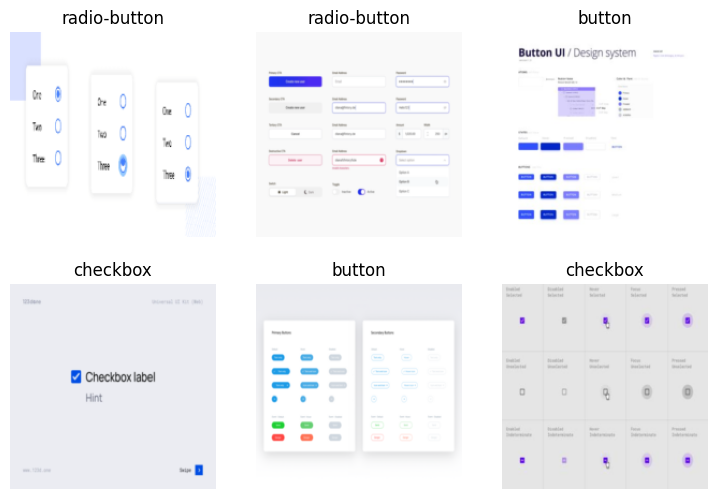

In [17]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.563399,1.236220,0.480519,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.142919,0.926255,0.376623,00:02
1,0.999139,1.289596,0.402597,00:02
2,0.793540,1.324309,0.389610,00:02


In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [15]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.881823,1.122385,0.487500,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.145321,1.006931,0.462500,00:02
1,0.962417,1.096256,0.475000,00:02
2,0.802094,1.147685,0.450000,00:02


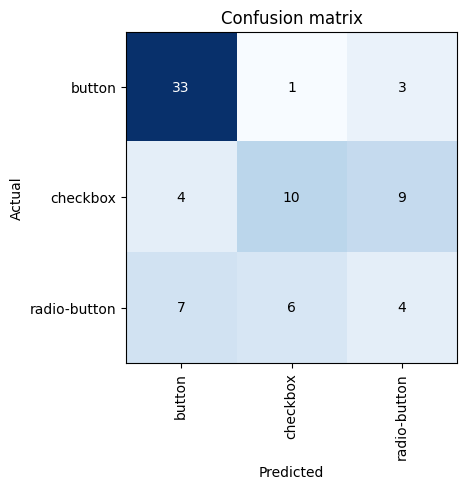

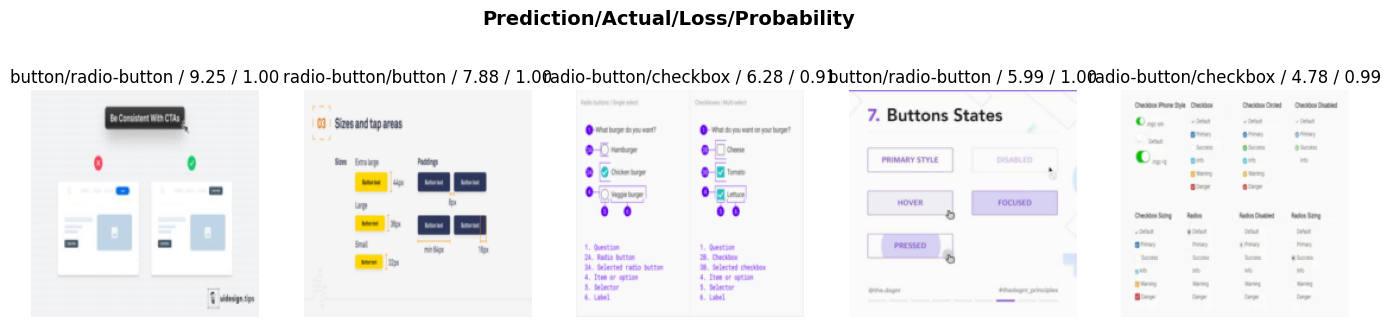

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [20]:
learn.export('model.pkl')